<a href="https://colab.research.google.com/github/AnahitShekikyan/ADS-505-Final-Team-Project/blob/main/ADS_505_Final_Team_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Data & Libraries**

In [ ]:
%%capture
!pip install dmba

#library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from dmba import classificationSummary
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Suppress all warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Path to the dataset in Google Drive
data = '/content/drive/MyDrive/creditcard.csv'

# Load the CSV into a pandas DataFrame
df = pd.read_csv(data)

# Display the first few rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **Basic Data Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Checking if there are there duplicates?
df.duplicated().sum()

1081

In [ ]:
# Removing duplicates
df = df.drop_duplicates()

In [ ]:
# Cheking if there is there class imbalance?
df['Class'].value_counts()

,count
Class,
0,283253
1,473


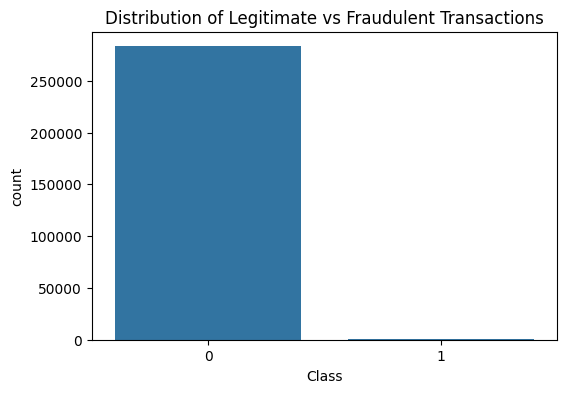

In [ ]:
# Plotting the class distribution to visualize the class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Legitimate vs Fraudulent Transactions')
plt.show()

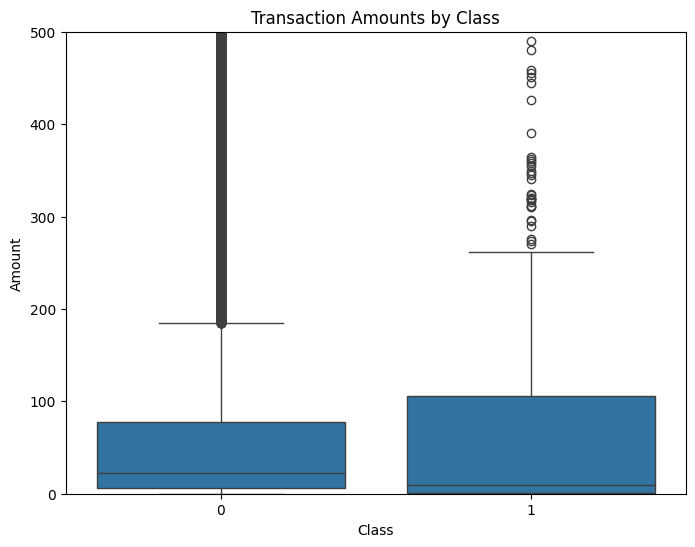

In [ ]:
# Plotting the transaction amounts for fraud vs non-fraud
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df)

# Limiting y-axis to focus on smaller amounts for clearer visualization
plt.ylim(0, 500)
plt.title('Transaction Amounts by Class')
plt.show()

# **Data Quality Report**

**##MI Comment: the summary stats below will not output well, too many columns, suggest not to keep that one or hash it out##**

In [ ]:
# Selecting numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Excluding any discrete features manually (e.g., "Class" is discrete, so you exclude it)
continuous_features = [col for col in numerical_columns if df[col].nunique() > 10 and col != 'Class']

print("Continuous features:", continuous_features)

Continuous features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [ ]:
# Summary stats
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [ ]:
def data_quality_report(df):

    # Initializing the report dictionary
    report = pd.DataFrame(index=df.columns)

    # Data types
    report['Data Type'] = df.dtypes

    # Counting missing values
    report['Missing Values'] = df.isnull().sum()

    # Counting percentage of missing values
    report['% Missing'] = (df.isnull().sum() / len(df)) * 100

    # Counting of unique values
    report['Unique Values'] = df.nunique()

    # Continuous features summary (only for float64 and int64)
    report['Min'] = df.min()
    report['Max'] = df.max()
    report['Mean'] = df.mean()
    report['Median'] = df.median()
    report['Standard Deviation'] = df.std()

    # Checking for duplicates
    report['Duplicates'] = df.duplicated().sum()

    # Determine cardinality for categorical variables (assumes non-continuous variables)
    report['Cardinality'] = [df[col].nunique() if df[col].dtype == 'object' else 'N/A' for col in df.columns]

    # Return the report
    return report

# Generating the Data Quality Report for the dataset
report = data_quality_report(df)

# Display the report
report

,Data Type,Missing Values,% Missing,Unique Values,Min,Max,Mean,Median,Standard Deviation,Duplicates,Cardinality
Time,float64,0,0.0,124592,0.000000,172792.000000,94811.077600,84692.500000,47481.047891,0,N/A
V1,float64,0,0.0,275663,-56.407510,2.454930,0.005917,0.020384,1.948026,0,N/A
V2,float64,0,0.0,275663,-72.715728,22.057729,-0.004135,0.063949,1.646703,0,N/A
V3,float64,0,0.0,275663,-48.325589,9.382558,0.001613,0.179963,1.508682,0,N/A
V4,float64,0,0.0,275663,-5.683171,16.875344,-0.002966,-0.022248,1.414184,0,N/A
V5,float64,0,0.0,275663,-113.743307,34.801666,0.001828,-0.053468,1.377008,0,N/A
V6,float64,0,0.0,275663,-26.160506,73.301626,-0.001139,-0.275168,1.331931,0,N/A
V7,float64,0,0.0,275663,-43.557242,120.589494,0.001801,0.040859,1.227664,0,N/A
V8,float64,0,0.0,275663,-73.216718,20.007208,-0.000854,0.021898,1.179054,0,N/A
V9,float64,0,0.0,275663,-13.434066,15.594995,-0.001596,-0.052596,1.095492,0,N/A


# **Univariate Analysis**

**For Continuous Features**

Summary statistics for continuous features:
                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43

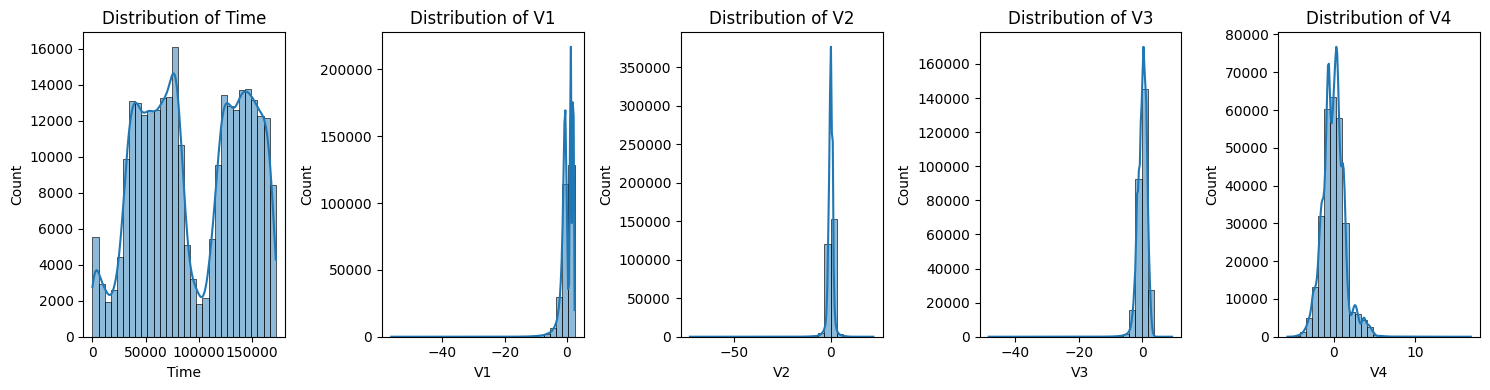

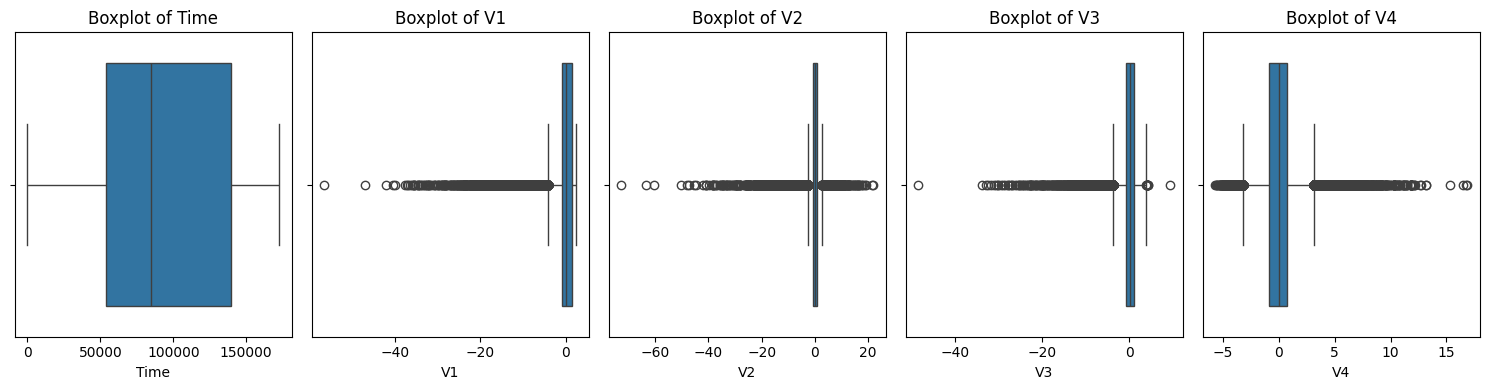

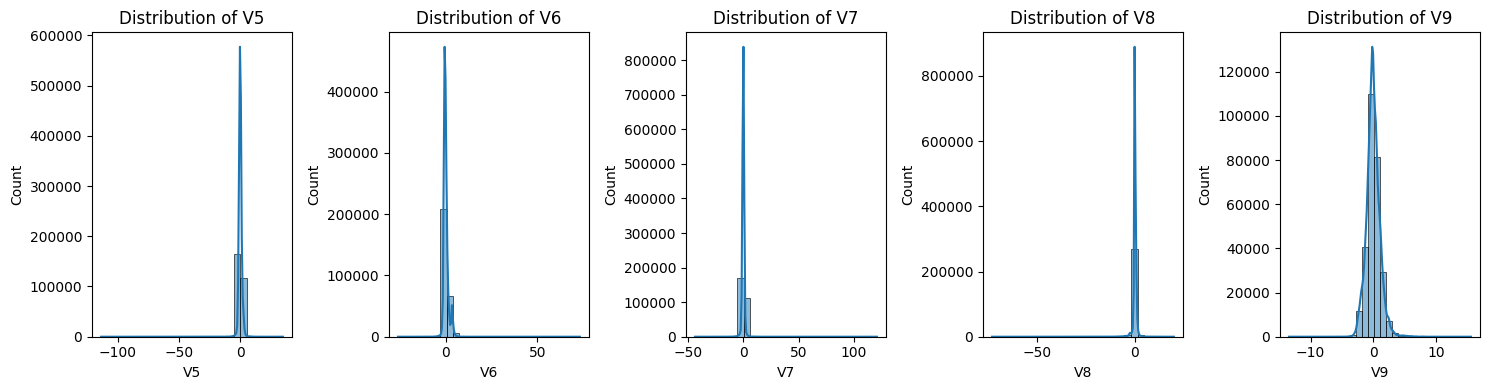

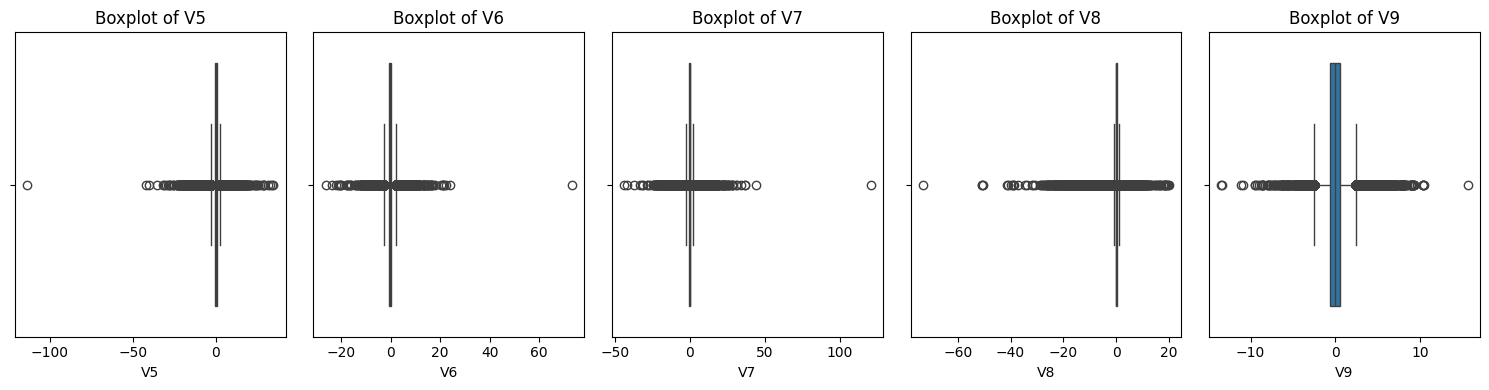

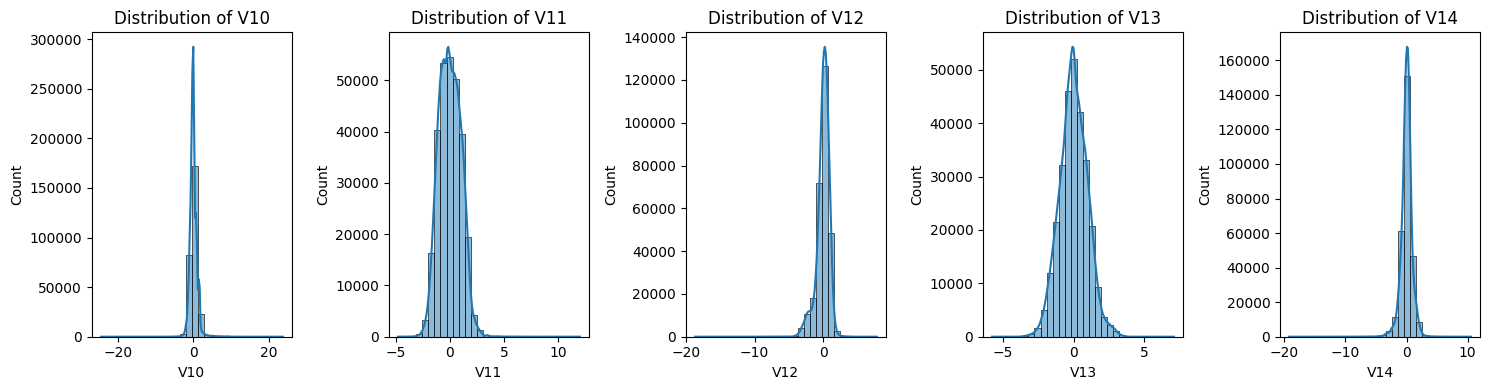

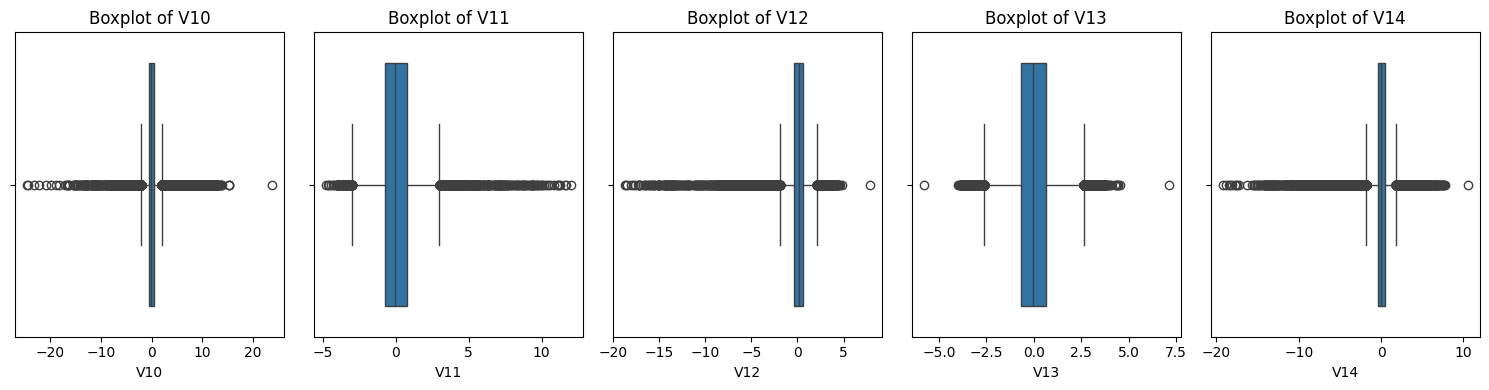

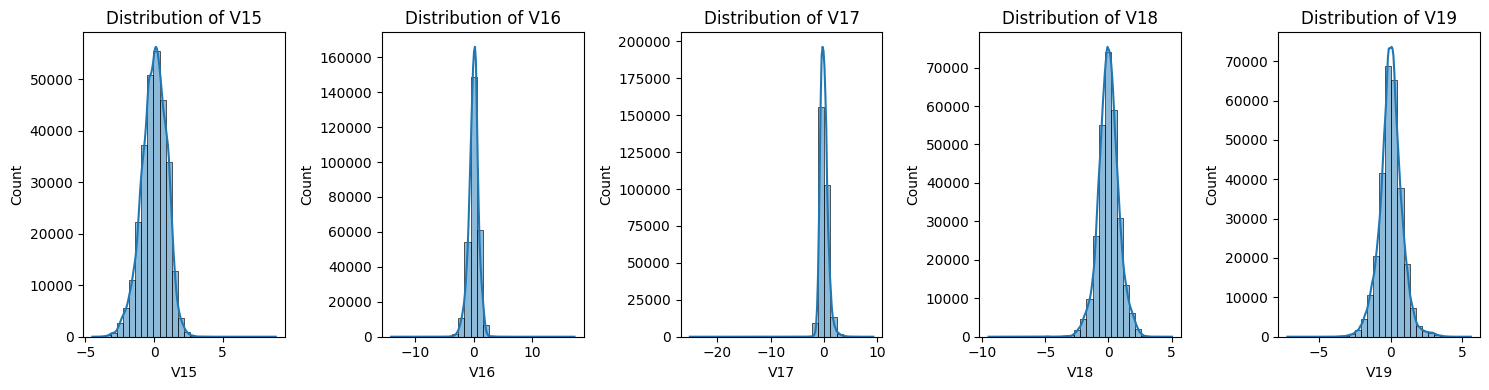

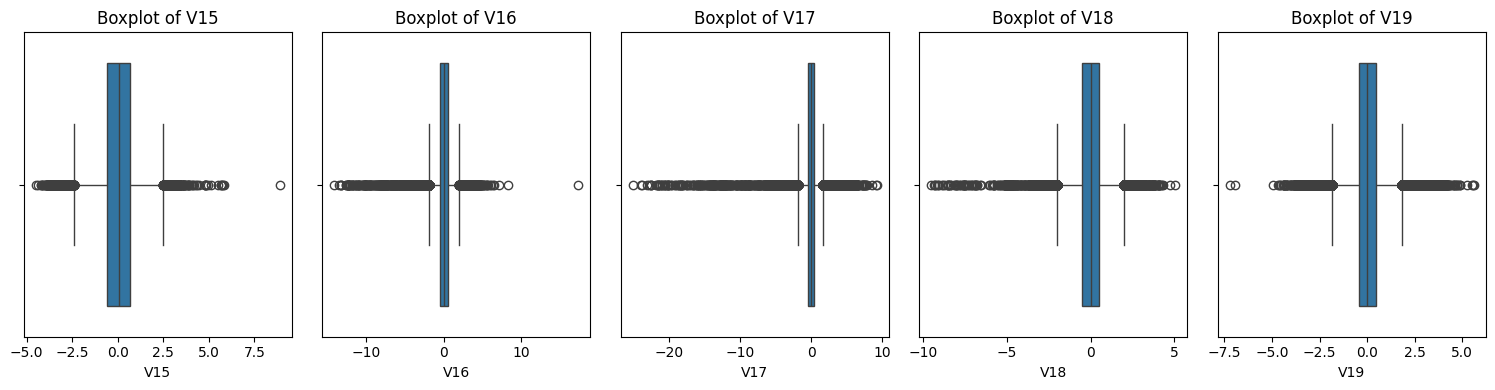

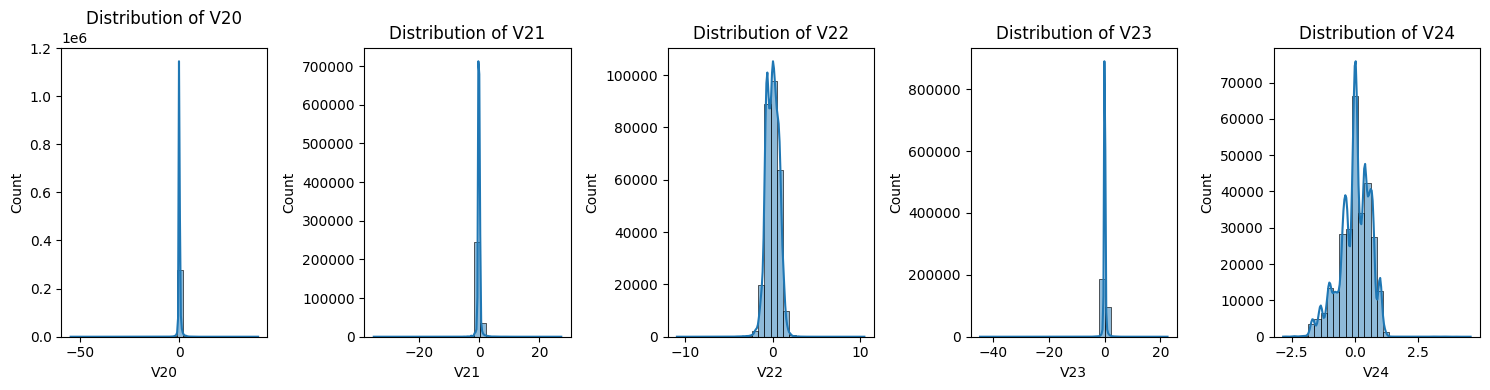

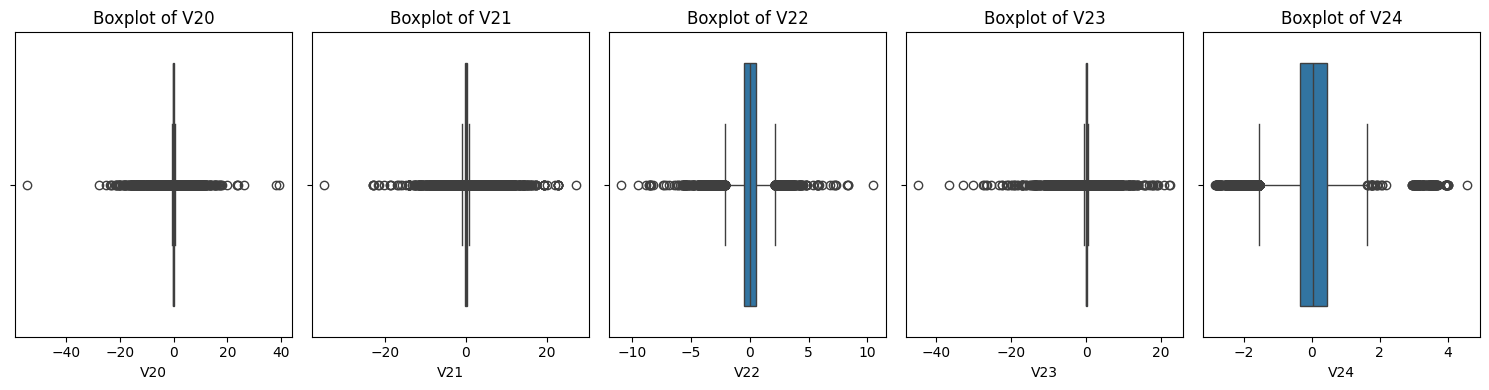

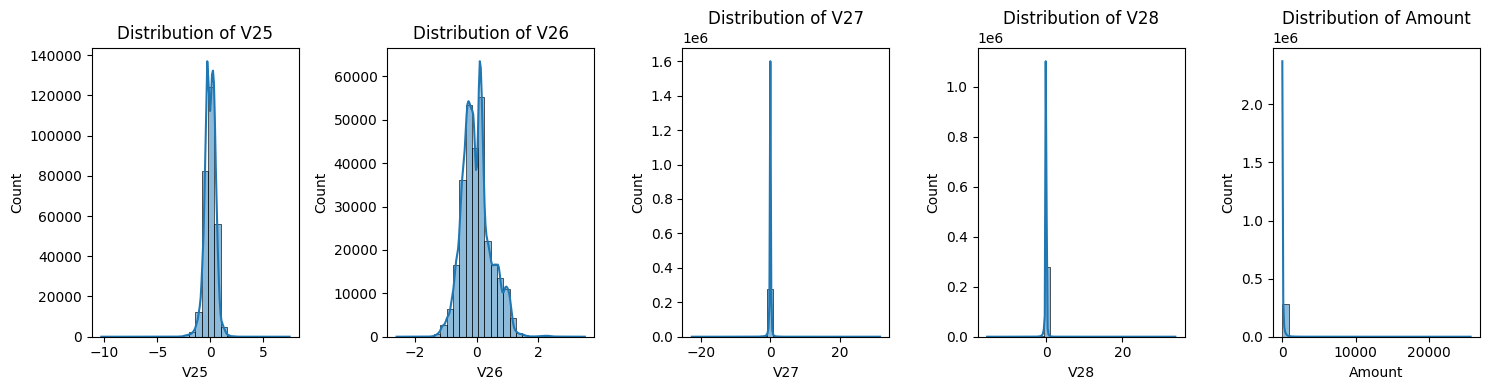

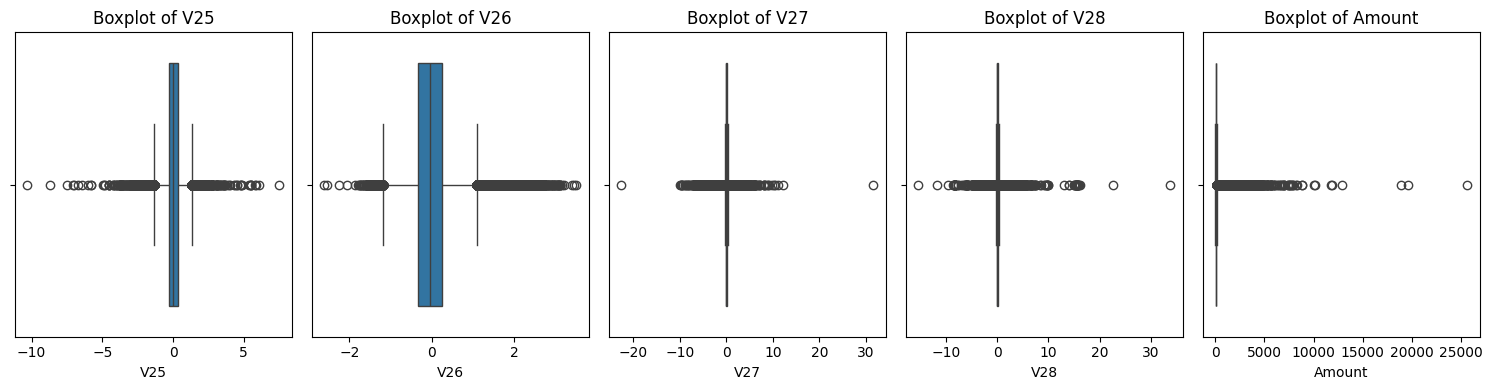

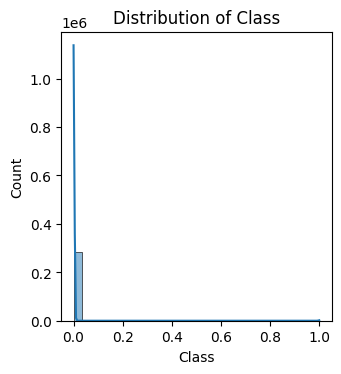

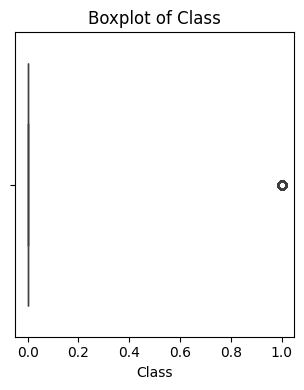

In [ ]:
# Generating summary statistics for continuous variables
continuous_features = df.select_dtypes(include=['float64', 'int64']).columns
print("Summary statistics for continuous features:")
print(df[continuous_features].describe())

# Visualizing continuous variables in sets of 5 per row
n_features = len(continuous_features)
n_cols = 5  # Number of plots per row

for i in range(0, n_features, n_cols):
    plt.figure(figsize=(15, 4))  # Adjust the width for 3 plots per row
    for j in range(n_cols):
        if i + j < n_features:
            feature = continuous_features[i + j]

            # Create subplot for histogram and boxplot
            plt.subplot(1, n_cols, j + 1)
            sns.histplot(df[feature], bins=30, kde=True)
            plt.title(f'Distribution of {feature}')

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

    # Second row with boxplots for the same features
    plt.figure(figsize=(15, 4))  # Separate figure for boxplots
    for j in range(n_cols):
        if i + j < n_features:
            feature = continuous_features[i + j]

            # Create subplot for boxplot
            plt.subplot(1, n_cols, j + 1)
            sns.boxplot(x=df[feature])
            plt.title(f'Boxplot of {feature}')

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

**For Categorical Features**

Frequency of Class:
Class
0    283253
1       473
Name: count, dtype: int64




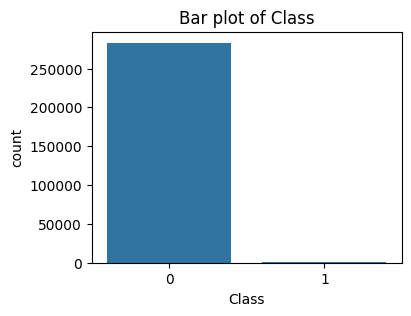

In [ ]:
# Treat 'Class' as a categorical feature since it's a binary variable (0: non-fraud, 1: fraud)
categorical_features = ['Class']

# Frequency counts for categorical variable 'Class'
for feature in categorical_features:
    print(f"Frequency of {feature}:")
    print(df[feature].value_counts())
    print("\n")

# Visualizing 'Class' with a bar plot
for feature in categorical_features:
    plt.figure(figsize=(4, 3))
    sns.countplot(x=feature, data=df)
    plt.title(f'Bar plot of {feature}')
    plt.show()

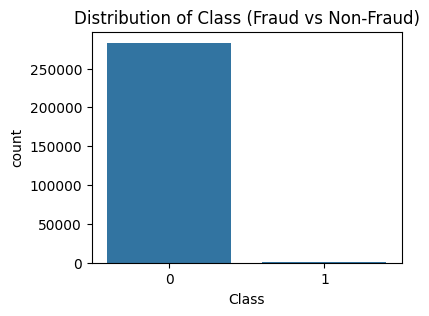

Percentage distribution of the target variable 'Class':
Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64


In [ ]:
# Visualizing the target variable 'Class'
plt.figure(figsize=(4, 3))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Class (Fraud vs Non-Fraud)')
plt.show()

# Display percentage of fraud vs non-fraud transactions
class_counts = df['Class'].value_counts(normalize=True) * 100
print("Percentage distribution of the target variable 'Class':")
print(class_counts)

# **Multivariate Analysis**

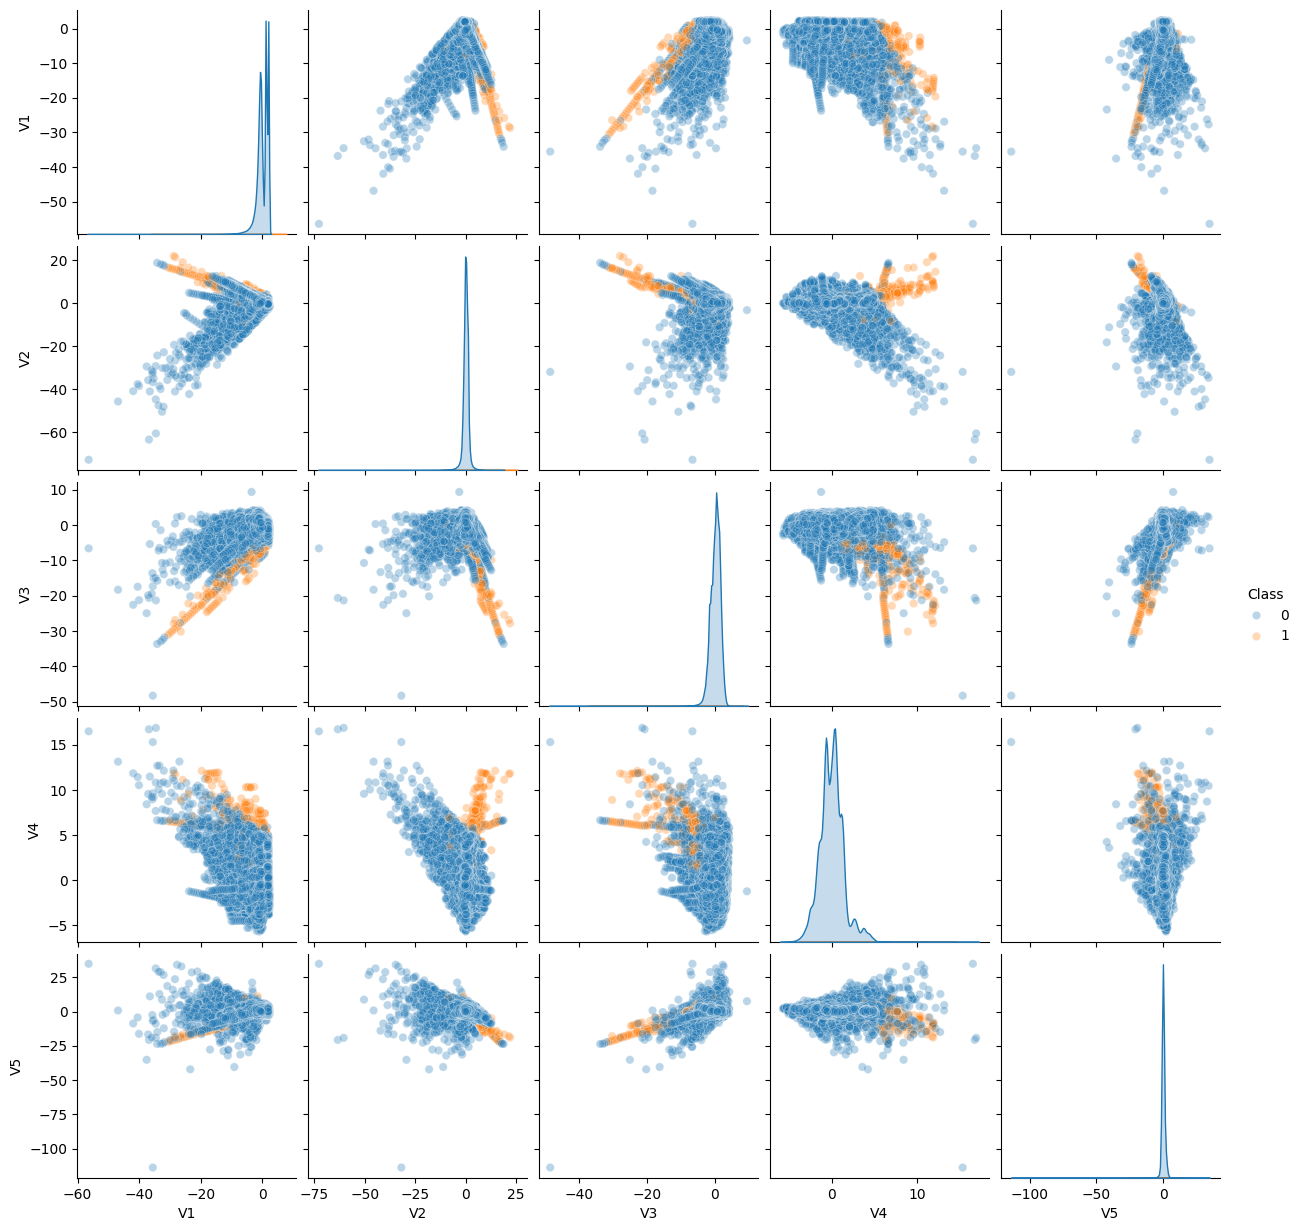

In [ ]:
# Using a subset of features to avoid too many plots (e.g., V1 to V5)
subset_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'Class']

# Creating a pair plot
sns.pairplot(df[subset_features], hue='Class', diag_kind='kde', plot_kws={'alpha': 0.3})
plt.show()

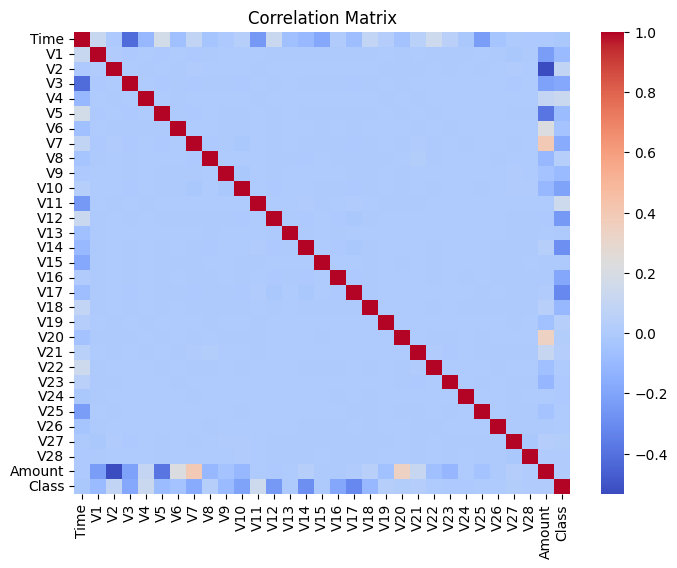

In [ ]:
# Computing the correlation matrix
corr_matrix = df.corr()

# Ploting the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

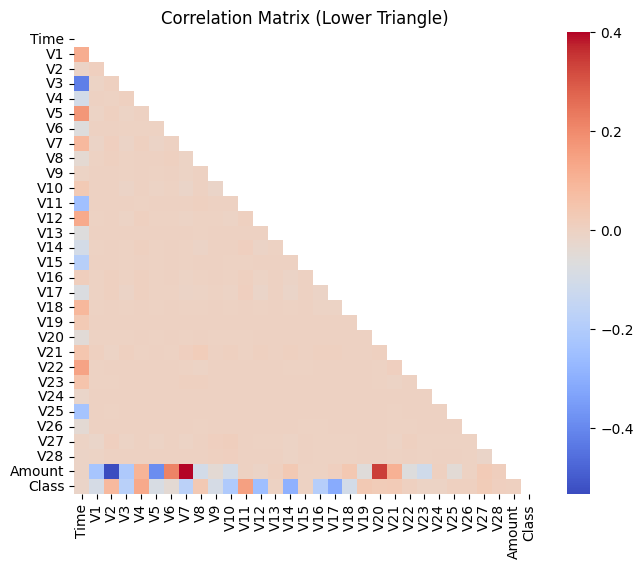

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=False, fmt='.2f', square=True)

plt.title('Correlation Matrix (Lower Triangle)')
plt.show()

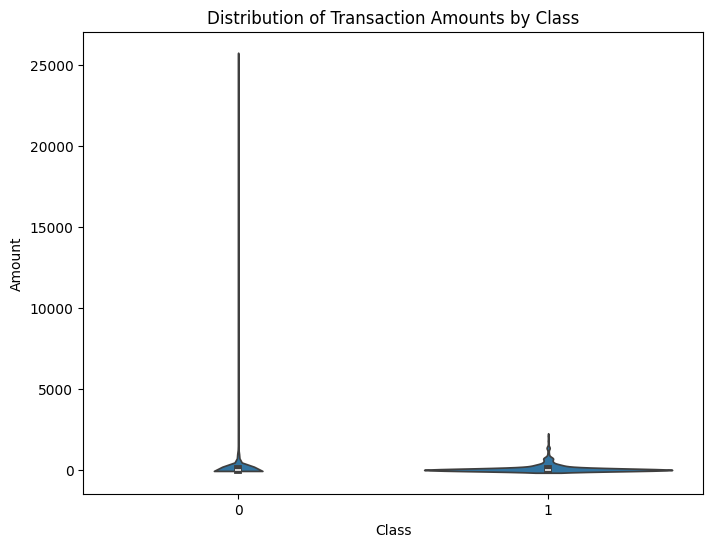

In [ ]:
# Violin plot for 'Amount' based on 'Class'
plt.figure(figsize=(8, 6))
sns.violinplot(x='Class', y='Amount', data=df)
plt.title('Distribution of Transaction Amounts by Class')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Only keeping numeric features (skip target 'Class')
X = df.drop(columns=['Class'])

# Calculating VIF (Variance Inflation Factor) for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

   Feature        VIF
0     Time   2.352783
1       V1   1.624955
2       V2   3.903164
3       V3   1.256154
4       V4   1.141139
5       V5   2.757256
6       V6   1.528109
7       V7   2.504461
8       V8   1.098777
9       V9   1.019334
10     V10   1.114508
11     V11   1.029512
12     V12   1.012571
13     V13   1.003473
14     V14   1.027096
15     V15   1.014514
16     V16   1.000847
17     V17   1.005537
18     V18   1.007009
19     V19   1.038012
20     V20   2.239605
21     V21   1.100434
22     V22   1.083646
23     V23   1.154552
24     V24   1.000682
25     V25   1.013613
26     V26   1.000516
27     V27   1.010059
28     V28   1.001721
29  Amount  11.650240


In [ ]:
# Group by 'Class' and compute summary statistics for continuous features
grouped_stats = df.groupby('Class').mean()
print(grouped_stats)

               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94835.058093  0.013439 -0.009829  0.012853 -0.010440  0.006769   
1      80450.513742 -4.498280  3.405965 -6.729599  4.472591 -2.957197   

             V6        V7        V8        V9  ...       V20      V21  \
Class                                          ...                      
0      0.001251  0.010447 -0.002448  0.002613  ... -0.000489 -0.00115   
1     -1.432518 -5.175912  0.953255 -2.522124  ...  0.405043  0.46655   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000160  0.000360  0.000393 -0.000301  0.000065  0.001409  0.000418   
1      0.086639 -0.096464 -0.106643  0.040615  0.050456  0.213774  0.078270   

           Amount  
Class              
0       88.413575  
1      123.871860  

[2 rows x 30 col

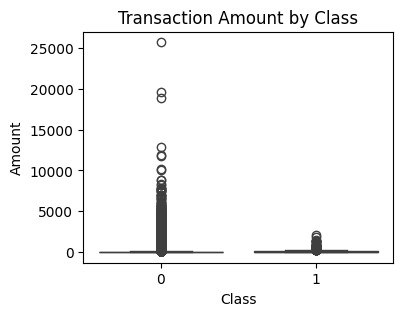

In [ ]:
# Box plot of Amount grouped by Class
plt.figure(figsize=(4, 3))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.show()

In [ ]:
# Checking for missing values
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


# **Scaling the Data**

For dataset on different scales, to normalize the features for models like logistic regression or SVM, MinMaxScaler is used

In [ ]:
# Initialize the scaler
scaler = MinMaxScaler()

# Apply scaling (excluding the target 'Class')
df_scaled = df.copy()
df_scaled.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# Verify scaling
df_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0


# **Handling Class Imbalance**

The credit card fraud dataset is highly imbalanced (with far more non-fraudulent transactions than fraudulent ones). Handling this imbalance is crucial for model performance.

SMOTE (Synthetic Minority Over-sampling Technique): Generates synthetic samples of the minority class to balance the dataset.

SMOTE is used in place of Undersampling which reduces the number of majority class samples. SMOTE generates synthetic samples of the minority class (fraudulent transactions) rather than reducing the number of samples from the majority class (non-fraudulent transactions). This retains valuable information from the majority class, which is critical when you have a large amount of normal transactions to learn from.

Class weight adjustment: Used in algorithms to give more importance to minority class samples.

In [ ]:
# Split data into features (X) and target (y)
X = df_scaled.drop('Class', axis=1)  # Scaled features
y = df_scaled['Class']               # Target variable (fraud or not fraud)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
def confusionMatrices(model, title):
    print(title + ' - training results')
    classificationSummary(y_resampled, model.predict(X_resampled))

#Model 1 - Logistic Regression

In [ ]:
# Initialize LogisticRegressionCV with class weights to handle imbalance
logit_reg = LogisticRegressionCV(cv=5, class_weight='balanced', max_iter=1000, solver='liblinear')

# Fit the model
logit_reg.fit(X_resampled, y_resampled)

# Evaluate on training data
logit_reg_confusion = confusionMatrices(logit_reg, 'Logistic regression')

Logistic regression - training results
Confusion Matrix (Accuracy 0.9509)

       Prediction
Actual      0      1
     0 221140   5457
     1  16798 209799


In [ ]:
# Summarize model performance
def summarize_model_performance(model, X_test, y_test, logit_reg):
    # Generate predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate AUC
    logit_reg_auc = roc_auc_score(y_test, y_pred_proba)

    # Print results
    print(f"{logit_reg} Accuracy: {accuracy:.4f}")
    print(f"{logit_reg} AUC: {logit_reg_auc:.4f}")

# Test the model on test data
summarize_model_performance(logit_reg, X_test, y_test, "Logistic Regression")


Logistic Regression Accuracy: 0.9755
Logistic Regression AUC: 0.9768


#Model 2 - Random Forest Classifier

In [ ]:
# Initialize RandomForestClassifier with class weights to handle imbalance
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Fit the model
rf_model.fit(X_resampled, y_resampled)

# Call the confusionMatrices function to evaluate the Random Forest model
rf_confusion = confusionMatrices(rf_model, 'Random Forest')

Random Forest - training results
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual      0      1
     0 226597      0
     1      0 226597


In [ ]:
# Summarize model performance
def summarize_model_performance(model, X_test, y_test, rf_model):
    # Generate predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate AUC
    rf_model_auc = roc_auc_score(y_test, y_pred_proba)

    # Print results
    print(f"{rf_model} Accuracy: {accuracy:.4f}")
    print(f"{rf_model} AUC: {rf_model_auc:.4f}")

# Test the model on test data
summarize_model_performance(rf_model, X_test, y_test, "Random Forest")

Random Forest Accuracy: 0.9996
Random Forest AUC: 0.9527


# Model 3 - Decision Tree Classifier

In [ ]:
# Initialize DecisionTreeClassifier with class weights to handle imbalance
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Fit the model
dt_model.fit(X_resampled, y_resampled)

# Call the confusionMatrices function to evaluate the Decision Tree model
dt_confusion = confusionMatrices(dt_model, 'Decision Tree')

Decision Tree - training results
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual      0      1
     0 226597      0
     1      0 226597


In [ ]:
# Summarize model performance
def summarize_model_performance(model, X_test, y_test, dt_model):
    # Generate predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate AUC
    dt_model_auc = roc_auc_score(y_test, y_pred_proba)

    # Print results
    print(f"{dt_model} Accuracy: {accuracy:.4f}")
    print(f"{dt_model} AUC: {dt_model_auc:.4f}")

# Test the model on test data
summarize_model_performance(dt_model, X_test, y_test, "Decision Tree")

Decision Tree Accuracy: 0.9977
Decision Tree AUC: 0.8602


# Model 4 - Neural Network